In [14]:
from sklearn.datasets import make_regression
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [15]:
random_state = 244827
n_samples = 2427

In [16]:
x, true_y = make_regression(n_features=1, random_state=random_state, n_samples=n_samples, noise=16)

Wygenerowane dane prezentują się w następujący sposób

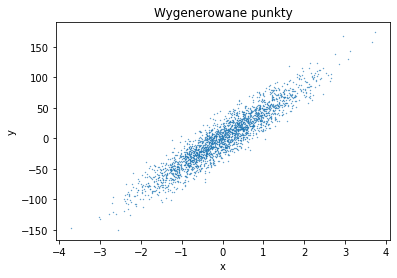

In [17]:
plt.scatter(x, true_y, s=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Wygenerowane punkty")

plt.show()

In [18]:
def f(w):
    return w[0] + x * w[1]

Obliczenie wspolczynników dla funkcji

In [19]:
a = np.concatenate((np.ones((n_samples, 1)), x), 1)
at = np.transpose(a)
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(at, a)), at), true_y)

In [20]:
predicted_y_analytical = f(w)

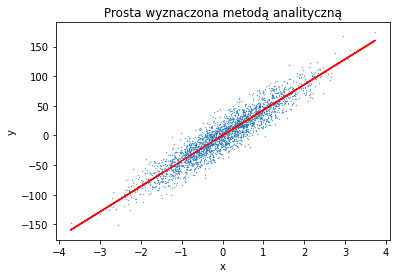

In [21]:
plt.scatter(x, true_y, s=0.1)
plt.plot(x, predicted_y_analytical, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Prosta wyznaczona metodą analityczną")
plt.show()

Funkcja strat dla metody numerycznej

In [22]:
def numerical_loss(w):
    ret = true_y - np.matmul(a, w)
    ret = np.matmul(ret.transpose(), ret)
    return 1/n_samples * ret

Poczatkowe wspolczynniki

In [23]:
start = np.ones((2,1))

In [24]:
minimized = minimize(numerical_loss, start, method='Powell')

In [25]:
print(minimized)

   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [-1.48232596e-05,  1.08347294e-07]])
     fun: 244.49829762936685
 message: 'Optimization terminated successfully.'
    nfev: 120
     nit: 3
  status: 0
 success: True
       x: array([2.65576200e-02, 4.28525431e+01])


In [26]:
predicted_y_numerical = f(minimized.x)

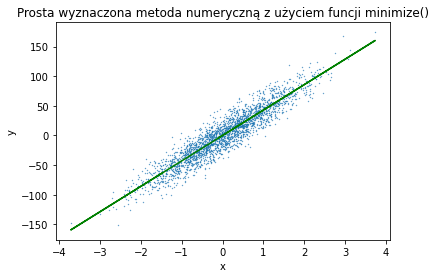

In [27]:
plt.scatter(x, true_y, s=0.1)
plt.plot(x, predicted_y_numerical, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Prosta wyznaczona metoda numeryczną z użyciem funcji minimize()")
plt.show()

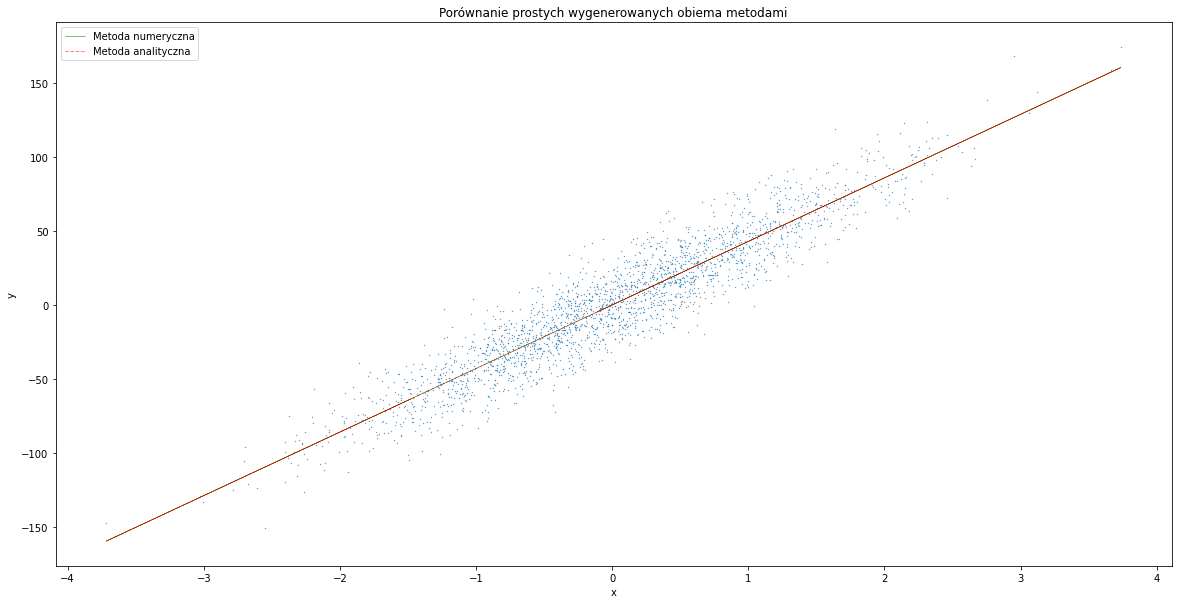

In [32]:
plt.scatter(x, true_y, s=0.1)
plt.plot(x, predicted_y_numerical, c='g', label='Metoda numeryczna', lw=0.5, ls='-')
plt.plot(x, predicted_y_analytical, c='r', label='Metoda analityczna', lw=0.5, ls='-.')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Porównanie prostych wygenerowanych obiema metodami")
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()


In [29]:
avg_sqr_err_num = np.mean((predicted_y_numerical - true_y) ** 2)
avg_sqr_err_an = np.mean((predicted_y_analytical - true_y) ** 2)


In [31]:
print(avg_sqr_err_num - avg_sqr_err_an)




8.711276677786373e-08
